### Data analysis of the treatment test for project SB2
In this file the data analysis of the treatment group for project SB2 is done. The full test cycle is shortened by omitting the -20 degree Celcius step to prevent outages. Data is preprocessed according to:
- Importing the data
- Slicing the data to keep only the data from the tests
- Centering the data around 0 degrees inclination (centering by inclination 0 and temperature 20)
- Matching the test data to reference data (closest timestamps method)

In the end we aim to make a comparison between the treatment and control tests through determination of the RMSE and min/max errors.

In [1]:
from blockbaxAnalyser import blockbaxAnalyser
from math import *
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np
plt.rcParams.update({'font.size': 26})

In [2]:
# ------------- CONTROL TEST ----------------
sb_numbers = [148039, 148097, 148105, 163083, 163085, 163076]
temp_steps = [-20, -10, 0, 10, 20, 30, 40, 50]
y_steps = [-10, -5, -2, -1, 0, 1, 2, 5, 10]

bins_refy = [-12, -7, -3.5, -1.14, -0.15, 0.8, 1.72, 3.5, 7, 12]
bins_temp = [-25, -15, -5, 5, 15, 25, 35, 45, 55]

test_start_datetime = "2023-01-19 18:30:00"
test_end_datetime = "2023-01-29 22:00:00"

offset_date_start = "2023-01-25 05:30:00"
offset_date_end = "2023-01-25 07:30:00"

control = blockbaxAnalyser(sb_numbers = sb_numbers, 
plot_from_date=test_start_datetime, 
plot_till_date=test_end_datetime)

control.bins_y = bins_refy
control.bins_temp = bins_temp
control.y_steps = y_steps
control.temp_steps = temp_steps

control.loadData()
control.loadRefData(filename = os.path.join(os.path.abspath('').removesuffix('blockbaxAnalyser.py'),"Ref","jewell_ref_control.txt"))
control.determineOffsets(offset_date_start,offset_date_end)
control.matchRefData()
for i in range(len(sb_numbers)): # Drop additional datetime column
    control.dfs[i].drop('Datetime', axis=1, inplace=True)
    print(control.dfs[i].to_string())

                     Temperature    Y value  Battery  Reference  Reference temp
Datetime                                                                       
2023-01-19 18:31:04   -16.900000  10.848744    3.565   9.951027         -16.633
2023-01-19 18:36:04   -17.500000  10.854848    3.565   9.953727         -17.147
2023-01-19 18:41:05   -17.900000  10.848744    3.570   9.941127         -17.449
2023-01-19 18:46:04   -18.100000  10.854848    3.570   9.953527         -17.652
2023-01-19 18:51:04   -18.299999  10.860951    3.570   9.947727         -17.736
2023-01-19 18:56:04   -18.400000  10.836537    3.568   9.956327         -17.805
2023-01-19 19:01:04   -18.500000  10.848744    3.566   9.956327         -17.851
2023-01-19 19:06:04   -18.500000  10.860951    3.571   9.967927         -17.873
2023-01-19 19:11:04   -18.600000  10.867055    3.566   9.946527         -17.880
2023-01-19 19:16:04   -18.600000  10.860951    3.570   9.933427         -17.900
2023-01-19 19:21:04   -18.600000  10.860

In [3]:
# ------------- TREATMENT TEST ----------------
sb_numbers = [148039, 148097, 148105, 163083, 163085, 163076]
temp_steps = [-20, -10, 0, 10, 20, 30, 40, 50]
y_steps = [-10, -5, -2, -1, 0, 1, 2, 5, 10]

bins_refy = [-12, -7, -3.5, -1.14, -0.15, 0.8, 1.72, 3.5, 7, 12]
bins_temp = [-25, -15, -5, 5, 15, 25, 35, 45, 55]

test_start_datetime = "2023-02-20 18:00:00"
test_end_datetime = "2023-02-28 21:00:00"

offset_date_start = "2023-02-24 18:30:00" # Problem: No offset can be determined for 
offset_date_end = "2023-02-24 21:30:00"

treatment = blockbaxAnalyser(sb_numbers = sb_numbers, 
plot_from_date=test_start_datetime, 
plot_till_date=test_end_datetime)

treatment.bins_y = bins_refy
treatment.bins_temp = bins_temp
treatment.y_steps = y_steps
treatment.temp_steps = temp_steps

treatment.loadData()
treatment.loadRefData(filename = os.path.join(os.path.abspath('').removesuffix('blockbaxAnalyser.py'),"Ref","jewell_ref_treatment.txt"))
treatment.determineOffsets(offset_date_start,offset_date_end)
treatment.matchRefData()

for i in range(len(sb_numbers)): # Drop additional datetime column
    treatment.dfs[i].drop('Datetime', axis=1, inplace=True)
    print(sb_numbers[i])
    print(treatment.dfs[i].to_string())

148039
                     Temperature    Y value  Battery  Reference  Reference temp
Datetime                                                                       
2023-02-20 18:01:09    -8.000000  10.050456    3.574   9.212735          -8.047
2023-02-20 18:06:08    -8.200000  10.056560    3.569   9.208235          -8.089
2023-02-20 18:11:11    -8.300000  10.056560    3.572   9.217535          -8.128
2023-02-20 18:16:09    -8.300000  10.062663    3.569   9.217035          -8.174
2023-02-20 18:21:08    -8.400000  10.050456    3.572   9.219235          -8.206
2023-02-20 18:26:09    -8.400000  10.044353    3.568   9.212035          -8.219
2023-02-20 18:31:08    -8.500000  10.044353    3.572   9.220635          -8.218
2023-02-20 18:36:10    -8.500000  10.050456    3.571   9.214335          -8.209
2023-02-20 18:41:08    -8.500000  10.044353    3.574   9.220635          -8.240
2023-02-20 18:46:09    -8.500000  10.032146    3.570   9.212735          -8.233
2023-02-20 18:51:09    -8.500000 

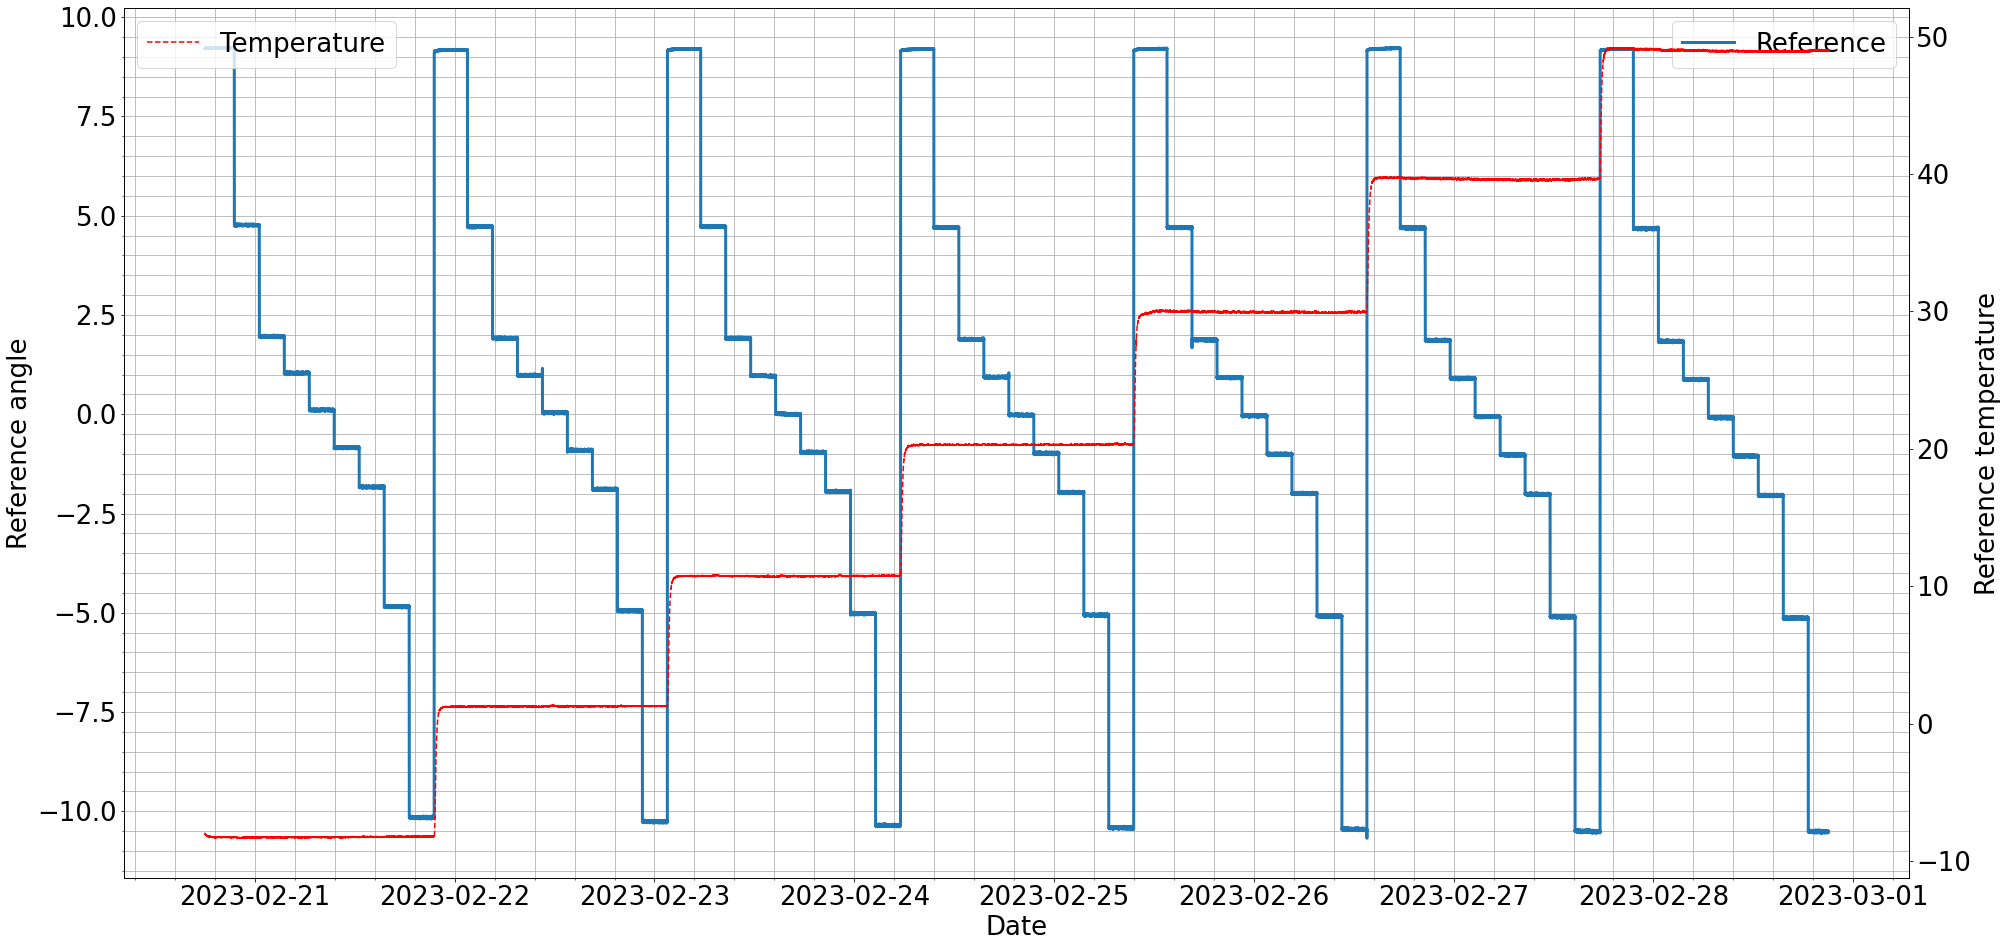

In [4]:
length = 0
for i in range(len(sb_numbers)): # Find which dataframe is most complete
    if len(treatment.dfs[i]) > length:
        length = len(treatment.dfs[i])
        number = i

fig,ax = plt.subplots(figsize=(32,16))
fig.set_facecolor('w')

ax.plot(treatment.refdf["Angle Y"], linewidth=3,label='Reference')
ax.set_xlabel("Date")
ax.set_ylabel("Reference angle")
ax.minorticks_on()
ax.grid(which='both', axis='both')
ax.legend(['Reference'], loc='upper right')

ax2 = ax.twinx()
ax2.plot(treatment.refdf["Temperature"], 'r--', label='JDI-200 temperature')
ax2.set_ylabel("Reference temperature")
ax2.legend(['Temperature'], loc='upper left')
plt.savefig('Figures\\Reference_treatment_full_plt.png',dpi='figure')
#plt.show()

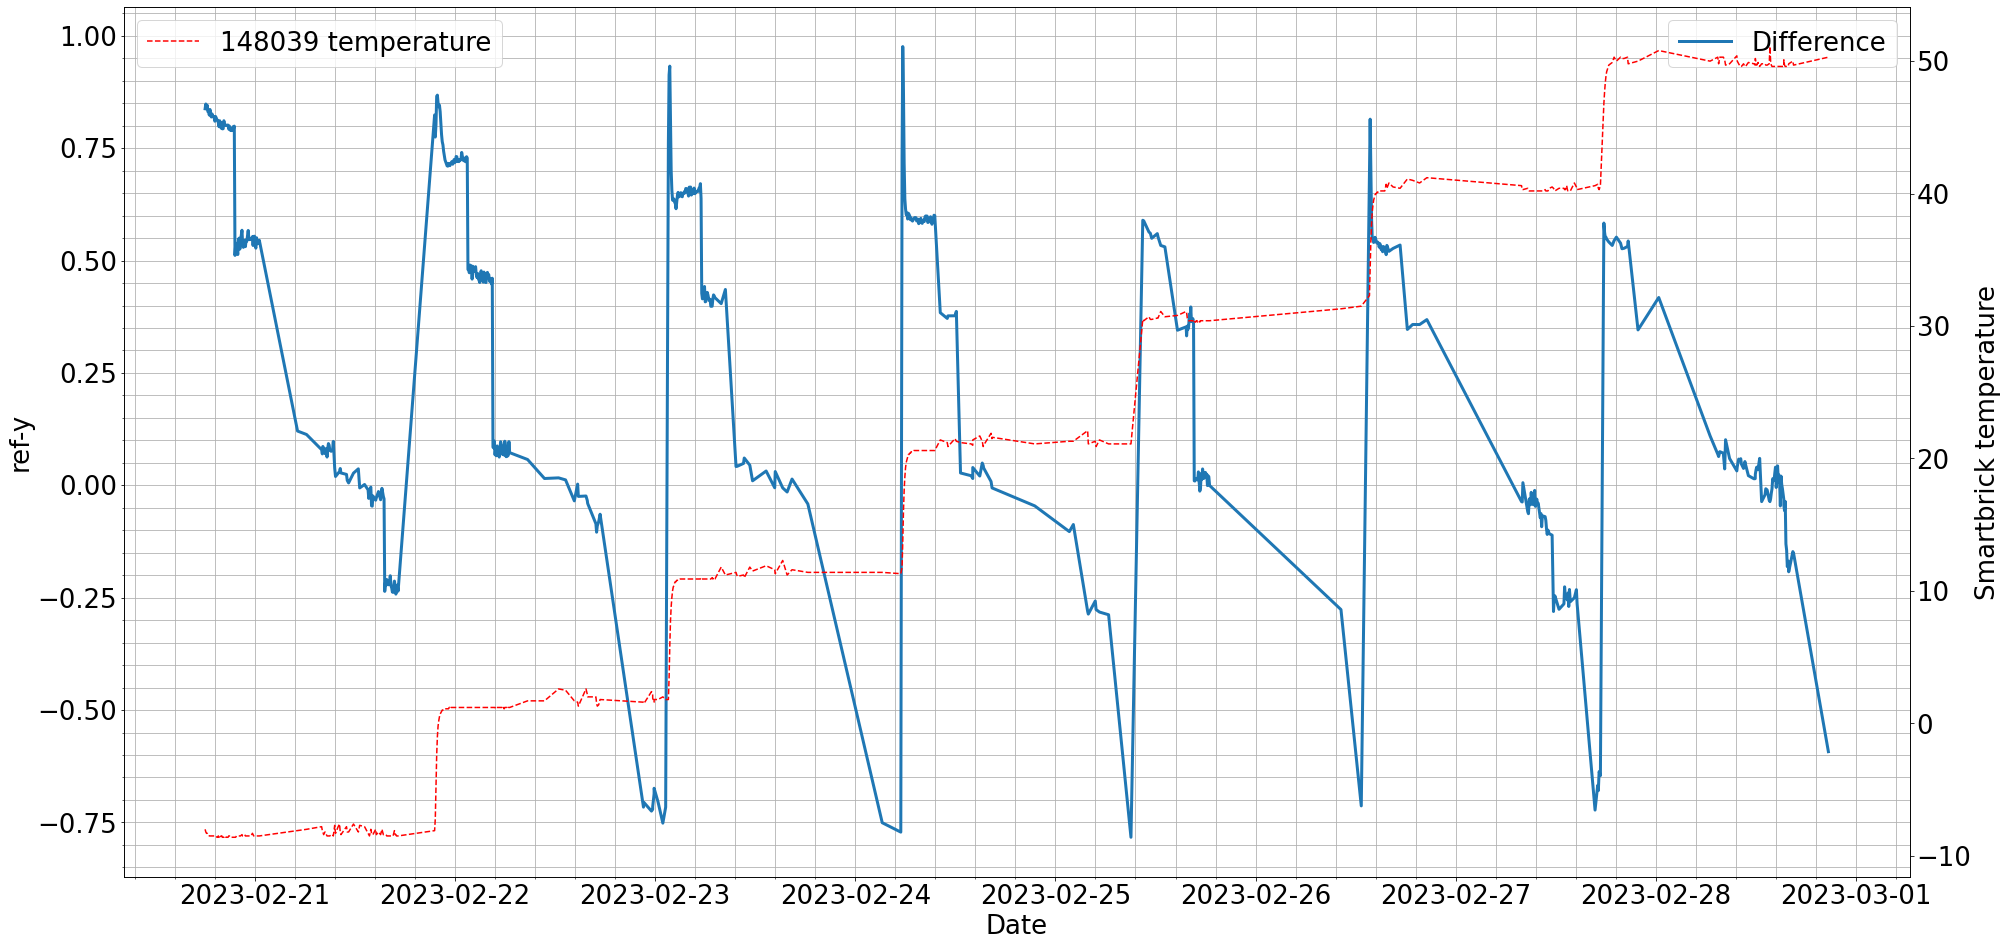

RMS error of  148039 :  0.4804158984726698  deg
Maximum error of  148039 :  0.9760706032314186  deg


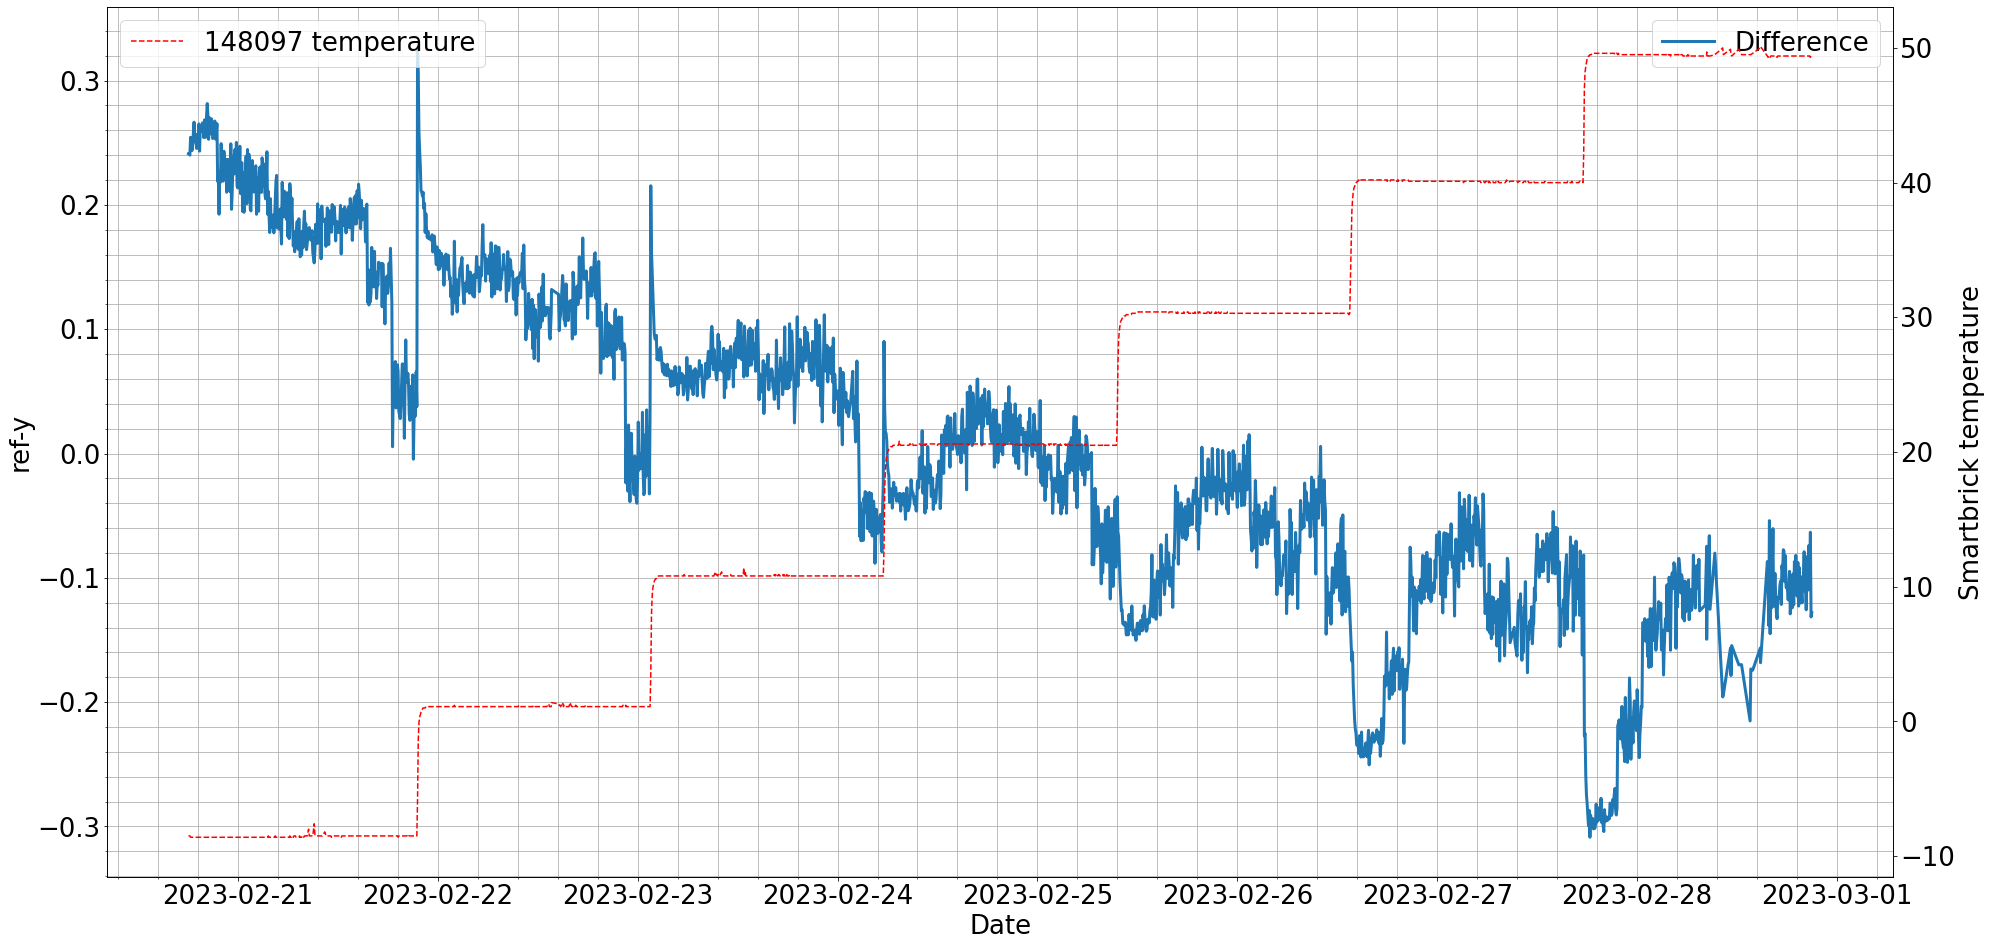

RMS error of  148097 :  0.12796161615978383  deg
Maximum error of  148097 :  0.3273667397060276  deg


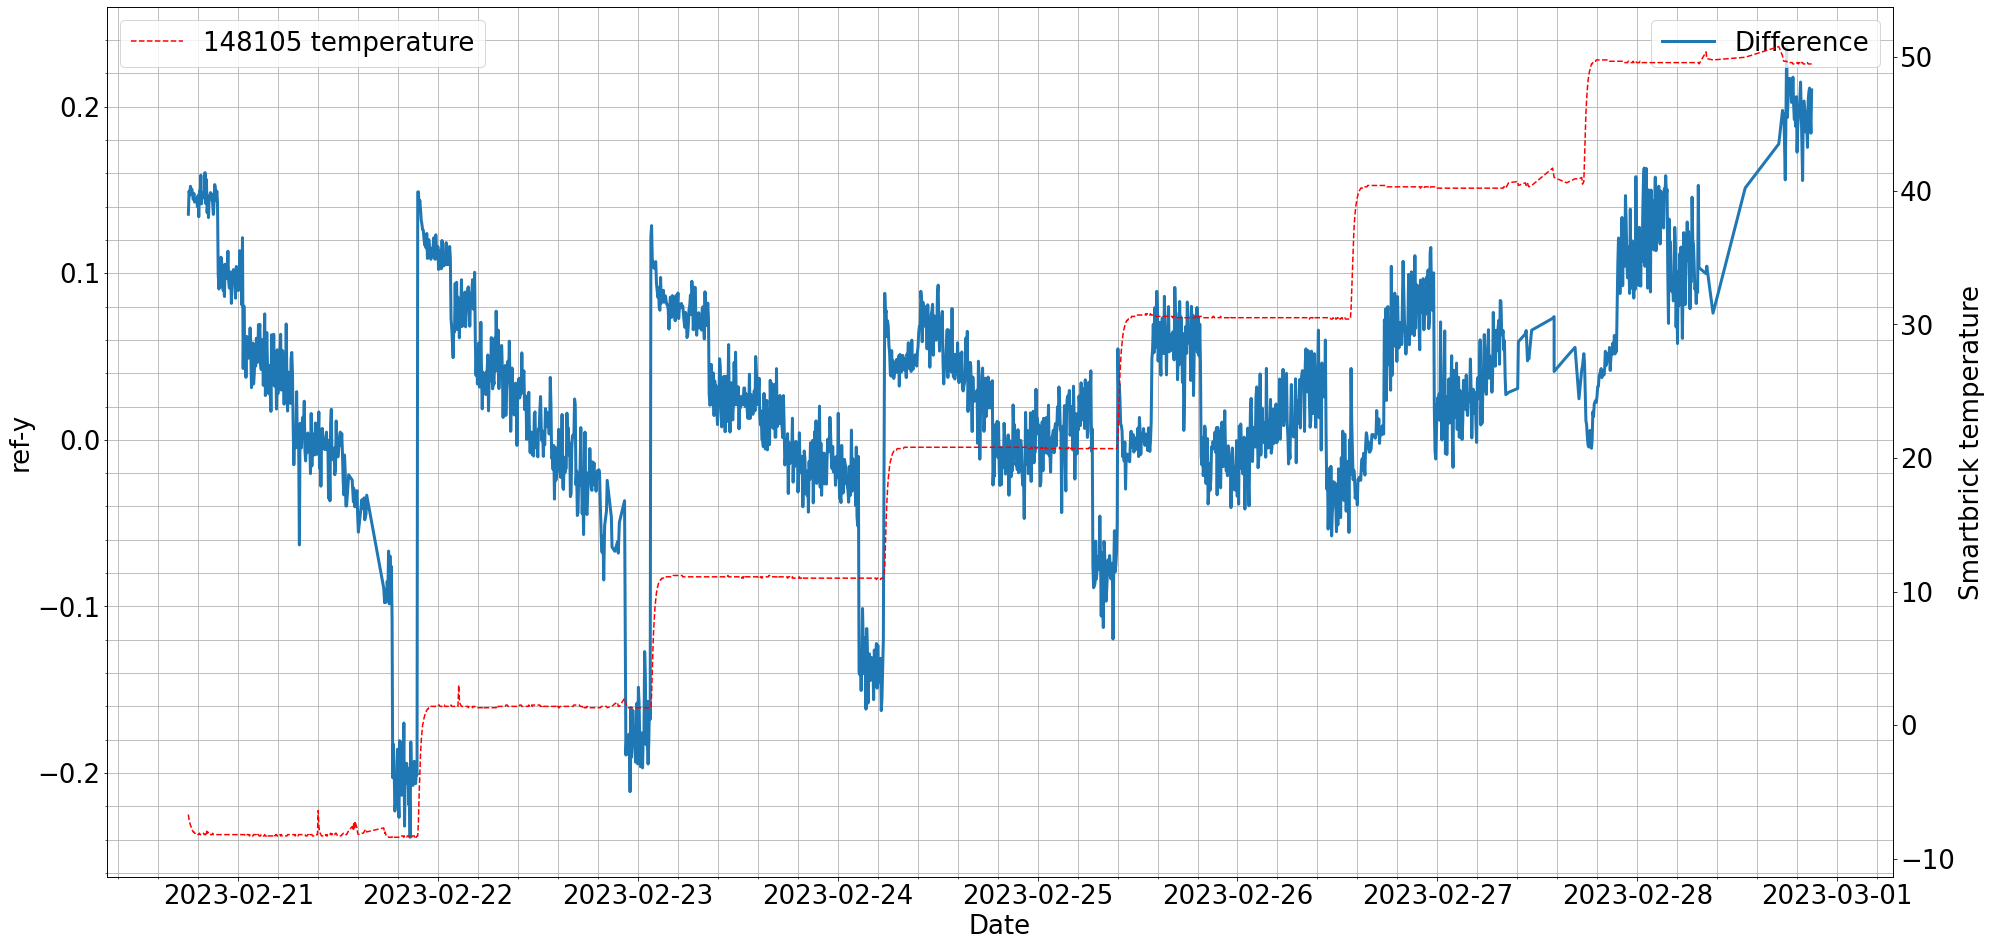

RMS error of  148105 :  0.07552634182158563  deg
Maximum error of  148105 :  0.23861079935647211  deg


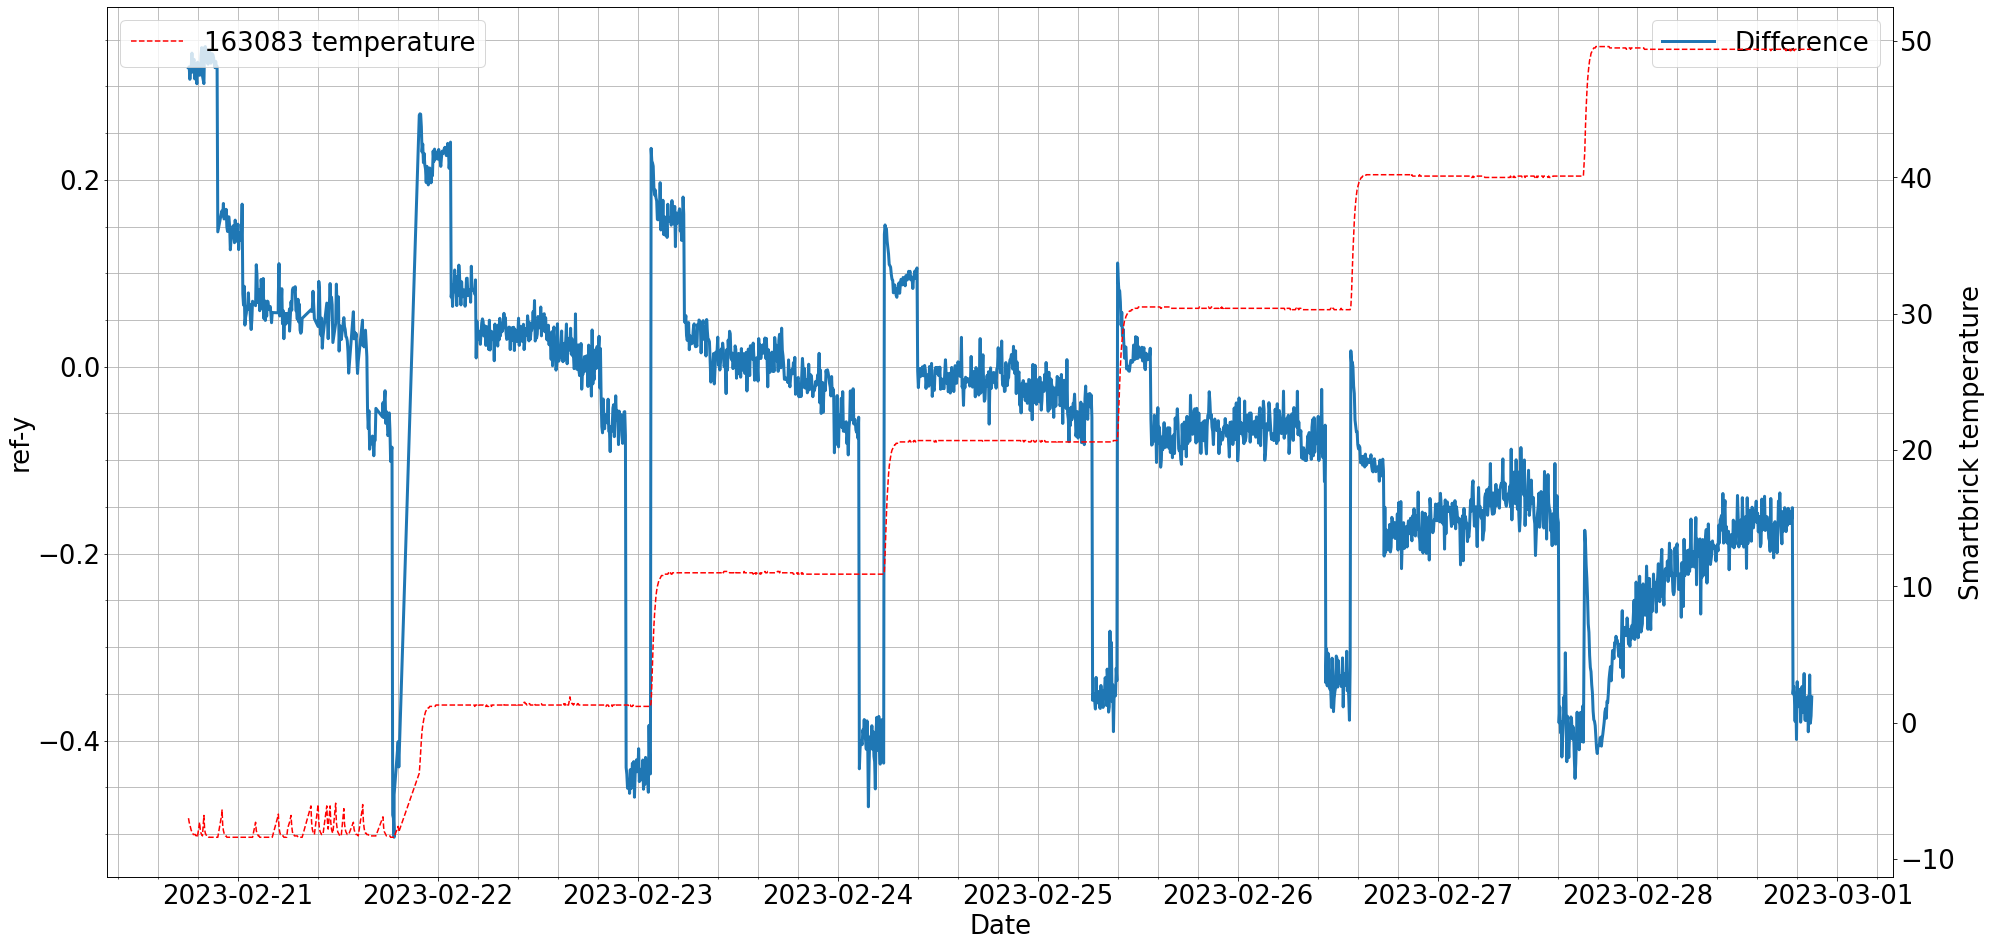

RMS error of  163083 :  0.17275737060926122  deg
Maximum error of  163083 :  0.5034580298862572  deg


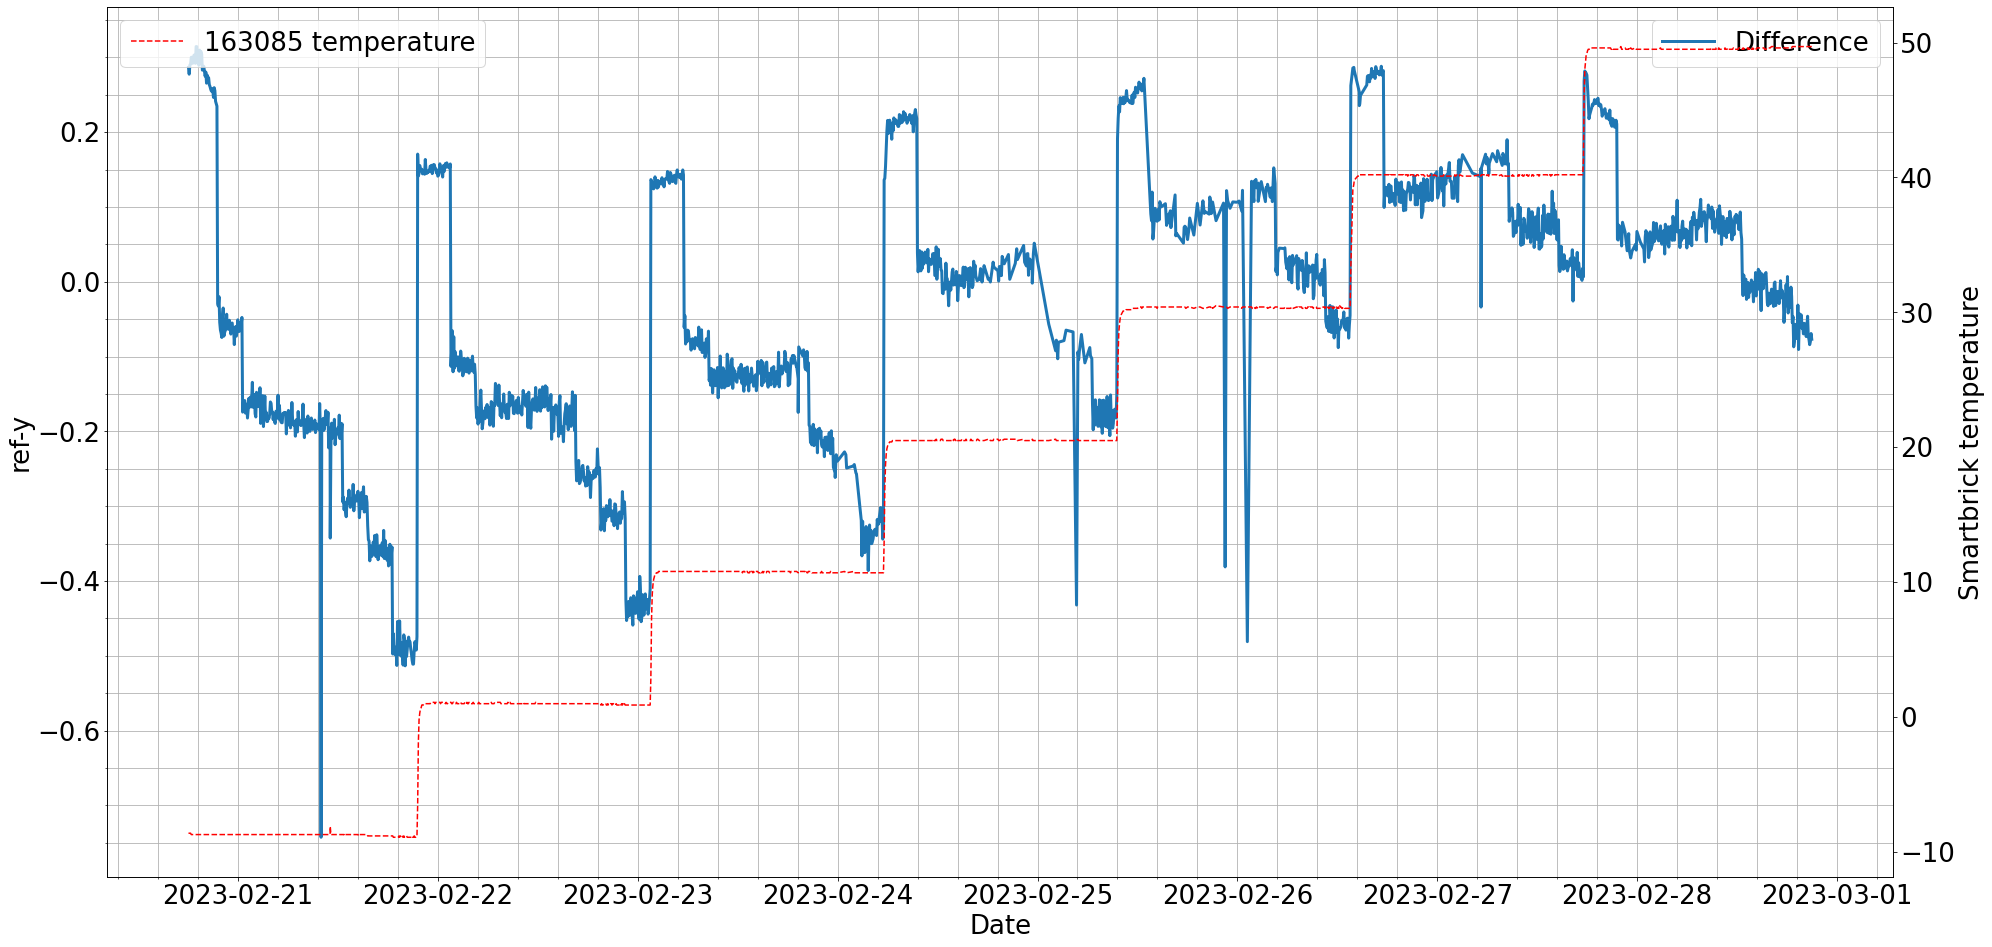

RMS error of  163085 :  0.1872906084907484  deg
Maximum error of  163085 :  0.7424646480045436  deg


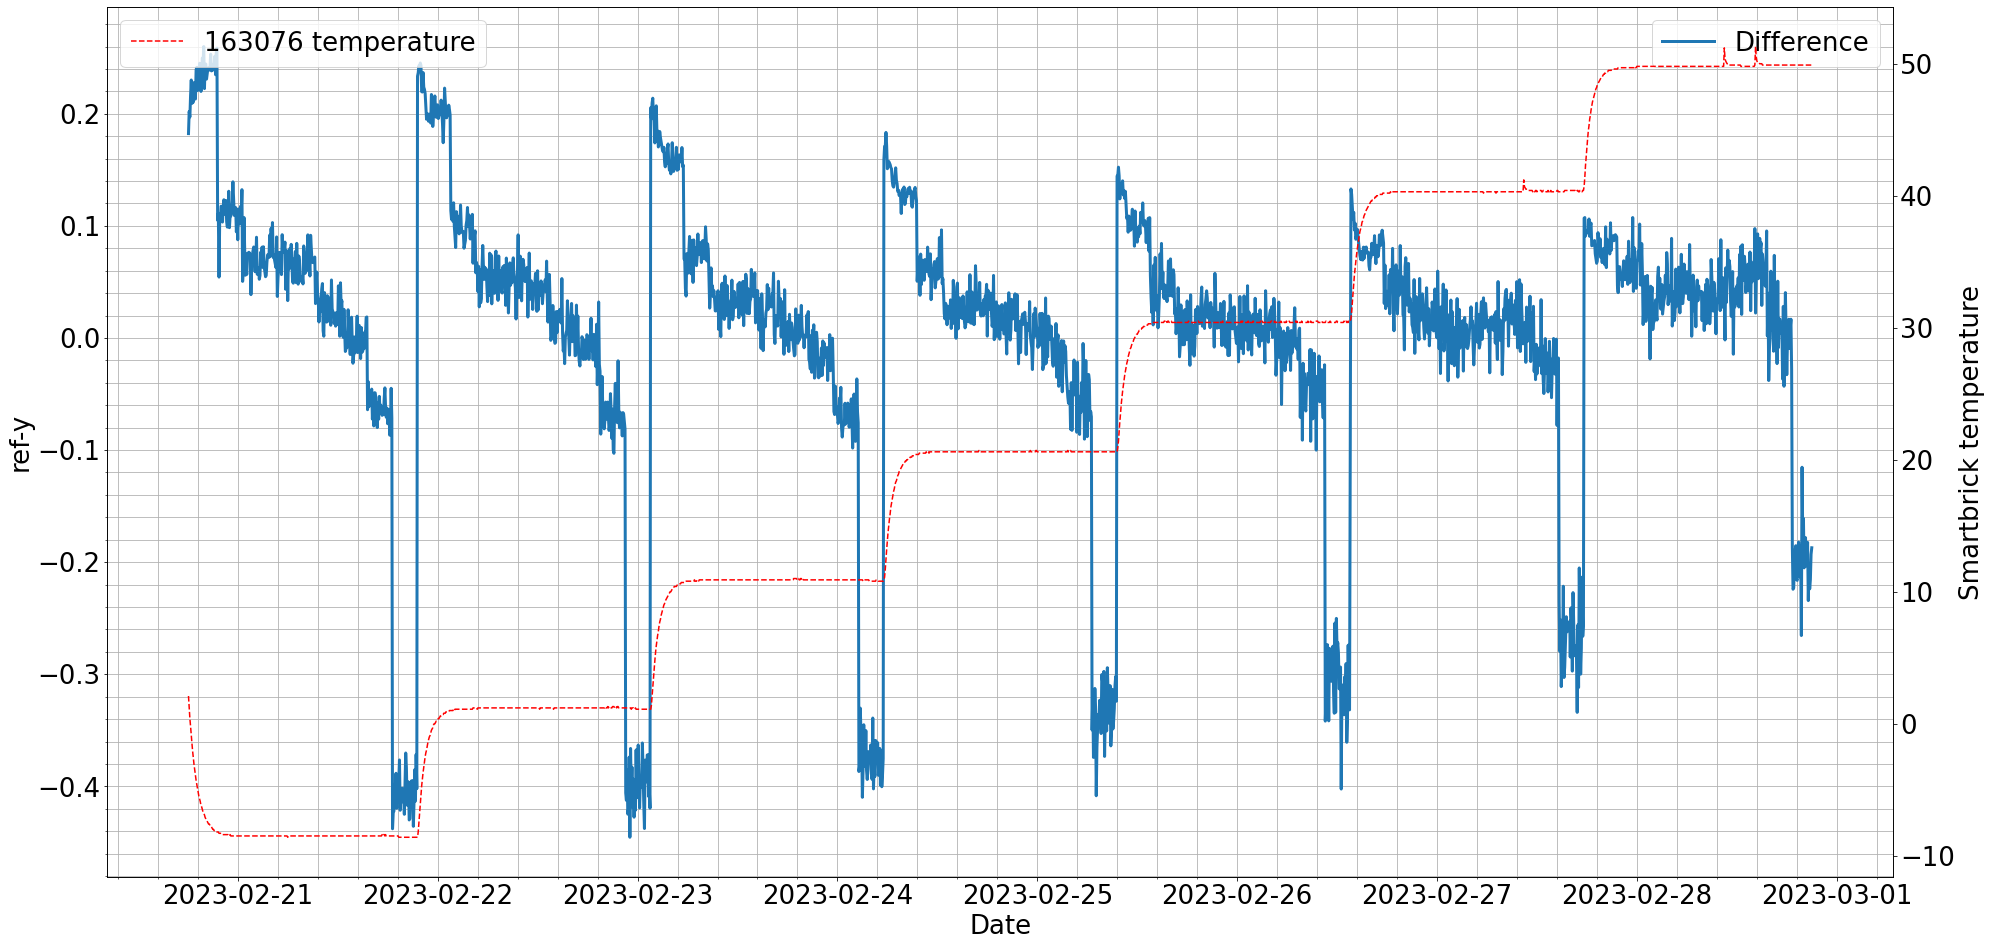

RMS error of  163076 :  0.13053675586979951  deg
Maximum error of  163076 :  0.4454273658237575  deg


In [5]:
for i in range(len(sb_numbers)):
    treatment.dfs[i]["Difference"] = (treatment.dfs[i]["Y value"] - treatment.dfs[i]["Reference"])

    fig,ax = plt.subplots(figsize=(32,16))
    fig.set_facecolor('w')

    ax.plot(treatment.dfs[i]["Difference"], linewidth=3,label='Difference')
    ax.set_xlabel("Date")
    ax.set_ylabel("ref-y")
    ax.minorticks_on()
    ax.grid(which='both', axis='both')
    ax.legend(['Difference'], loc='upper right')

    ax2 = ax.twinx()
    ax2.plot(treatment.dfs[i]["Temperature"], 'r--', label=str(sb_numbers[i])+' temperature')
    ax2.set_ylabel("Smartbrick temperature")
    ax2.legend([str(sb_numbers[i])+' temperature'], loc='upper left')
    plt.savefig('Figures\\Difference_treatment_'+str(sb_numbers[i])+'.png',dpi='figure')
    plt.show()

    # Performance evaluation
    RMS = sqrt((treatment.dfs[i]["Difference"]**2).mean())
    MAX = max(abs(treatment.dfs[i]["Difference"]))
    print("RMS error of ", sb_numbers[i], ": ", RMS, " deg")
    print("Maximum error of ", sb_numbers[i], ": ", MAX, " deg")